# Currency exchange rate trends analyzer

### Trend analysis for EURPLN exchange rates using data from 2013.09.09 to 2016.09.05 time period

In [103]:
# customarilily import most important libraries

import pandas as pd                       # pandas is a dataframe library
import matplotlib.pyplot as plt           # matplotlib.pyplot plots data
import numpy as np                        # numpy provides N-dim object support

import matplotlib.dates as mdates         


# do ploting inline instead of in a separate window
%matplotlib inline

In [104]:
df = pd.read_csv('./data-archive/EUR_2013.09.09_2016.09.05.csv', sep=';')     # load data

In [105]:
# get brief statistics over data we just read
df_columns, df_rows = df.shape

print("File contains {} rows and {} columns of data.".format(df_columns, df_rows))

File contains 755 rows and 4 columns of data.


#### Show first 3 rows from file

In [106]:
df.head(3)

,Data,Kurs,Zmiana,Nazwa Tabeli
0,2016-09-05,4.3480,-0.72,171/A/NBP/2016
1,2016-09-02,4.3796,0.43,170/A/NBP/2016
2,2016-09-01,4.3607,0.12,169/A/NBP/2016


#### Show last 3 rows from file

In [107]:
df.tail(3)

,Data,Kurs,Zmiana,Nazwa Tabeli
752,2013-09-11,4.2408,-0.54,176/A/NBP/2013
753,2013-09-10,4.2637,-0.15,175/A/NBP/2013
754,2013-09-09,4.2700,-0.64,174/A/NBP/2013


As we can see, data are not ordered chronologically. We must reverse the order of rows so that first row is the oldest, last row is the newest.

In [108]:
df = df.sort_index(axis=0, ascending=True)
df = df.iloc[::-1]
df.head(3)

,Data,Kurs,Zmiana,Nazwa Tabeli
754,2013-09-09,4.2700,-0.64,174/A/NBP/2013
753,2013-09-10,4.2637,-0.15,175/A/NBP/2013
752,2013-09-11,4.2408,-0.54,176/A/NBP/2013


In [109]:
df.tail(3)

,Data,Kurs,Zmiana,Nazwa Tabeli
2,2016-09-01,4.3607,0.12,169/A/NBP/2016
1,2016-09-02,4.3796,0.43,170/A/NBP/2016
0,2016-09-05,4.3480,-0.72,171/A/NBP/2016


Data frame (rows) is reversed now, which we can prove by observing values on the diagram

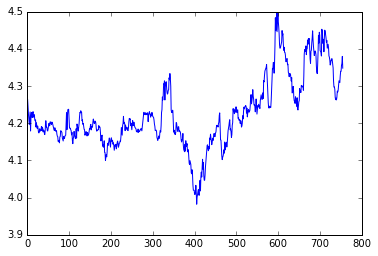

In [110]:
plt.plot(df['Kurs'].values)

### SMA - simple moving average

In [111]:
# an example on how to calculate SMA for a collection of data
v = {'score': [1, 2, 2, 3, 3, 4]}
data_frame = pd.DataFrame(v)
pd.rolling_mean(data_frame, 2)

,score
0,NaN
1,1.5
2,2.0
3,2.5
4,3.0
5,3.5


#### Calculate various SMA 

In order to perform better analysis, we will use recent data

In [112]:
# get last 100 exchange rates
last_days_to_analyze = 300
last_days_to_observe = 200

recent_exchange_rates = df['Kurs'].values[-last_days_to_analyze:]
recent_dates = df['Data'].values[-last_days_to_analyze:]

In [113]:
# create new DataFrame containing exchange rates ordered chronologically (oldest first, newest last)
df_exchange_rates = pd.DataFrame(recent_exchange_rates)

# calculate most common SMA (for short-term traders)
df_sma_10 = pd.rolling_mean(df_exchange_rates, 10)
df_sma_20 = pd.rolling_mean(df_exchange_rates, 20)
df_sma_50 = pd.rolling_mean(df_exchange_rates, 50)

In [114]:
# get data for last days we are interested in
recent_exchange_rates = recent_exchange_rates[-last_days_to_observe:]
recent_dates = recent_dates[-last_days_to_observe:]
sma_10 = df_sma_10[-last_days_to_observe:].values
sma_20 = df_sma_20[-last_days_to_observe:].values
sma_50 = df_sma_50[-last_days_to_observe:].values

#### Plot exchange rates along with different SMA

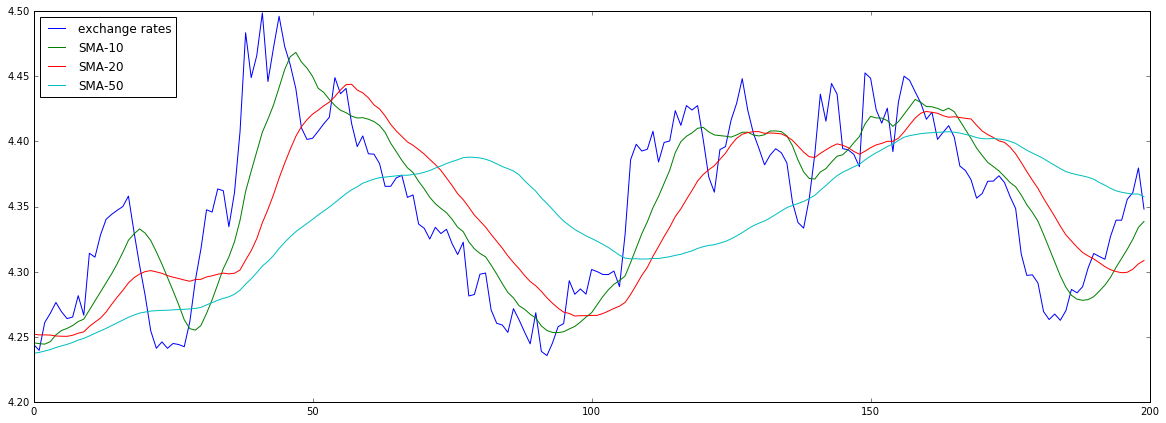

In [115]:
plt.figure(figsize=(20,7))

plt.plot(recent_exchange_rates)
plt.plot(sma_10)
plt.plot(sma_20)
plt.plot(sma_50)

plt.legend(['exchange rates', 'SMA-10', 'SMA-20', 'SMA-50'], loc='upper left')

### Example on how to find points where the curves intersect

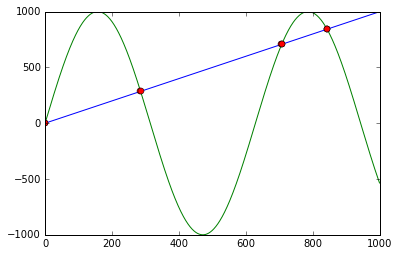

In [116]:

x = np.arange(0, 1000)
f = np.arange(0, 1000)
g = np.sin(np.arange(0, 10, 0.01)) * 1000

plt.plot(x, f, '-')
plt.plot(x, g, '-')

idx = np.argwhere(np.isclose(f, g, atol=10)).reshape(-1)
plt.plot(x[idx], f[idx], 'ro')
plt.show()

#### Calculate intersection points between various SMA data ranges

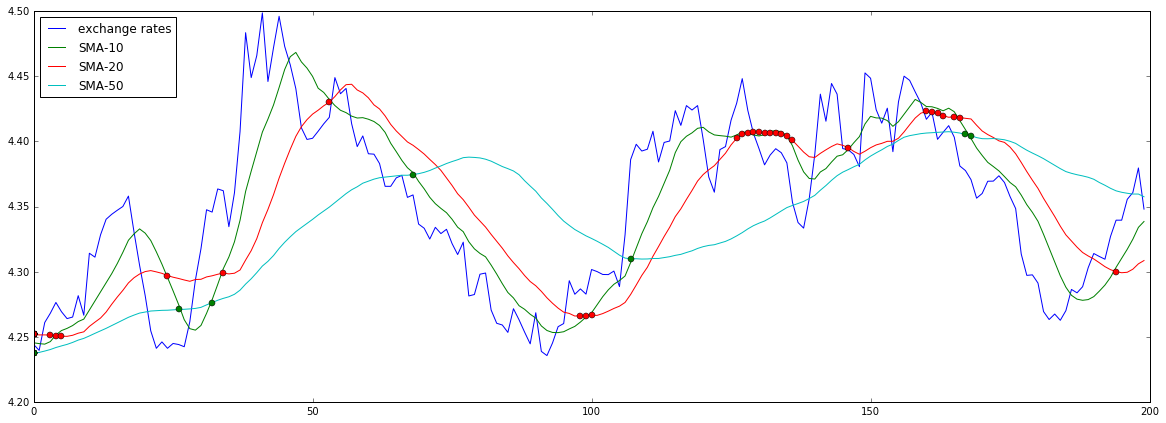

In [117]:
plt.figure(figsize=(20,7))

plt.plot(recent_exchange_rates)
plt.plot(sma_10)
plt.plot(sma_20)
plt.plot(sma_50)

# find intersection points between SMA-10 and SMA-20 data series
sma_20_idx = np.argwhere(np.isclose(sma_10, sma_20, atol=0.005)).reshape(-1)

# find intersection point between SMA-10 and SMA-50 data series
sma_50_idx = np.argwhere(np.isclose(sma_10, sma_50, atol=0.005)).reshape(-1)

# draw intersection points
plt.plot(x[sma_20_idx], sma_20[sma_20_idx], 'ro')
plt.plot(x[sma_50_idx], sma_50[sma_50_idx], 'go')

# draw legend
plt.legend(['exchange rates', 'SMA-10', 'SMA-20', 'SMA-50'], loc='upper left')

In [122]:
# get intersection points between SMA-10 and SMA-20
sma_10_sma_20_insersection_points = list(sma_20_idx)[::2]

# get intersection points between SMA-10 and SMA-50
sma_10_sma_50_insersection_points = list(sma_50_idx)[::2]

print("intersection points between SMA-10 and SMA-20:")
print(sma_10_sma_20_insersection_points)
for i in sma_10_sma_20_insersection_points:
    print("{} ==> date: {}, exchange rate: {}".format(i, recent_dates[i], recent_exchange_rates[i]))
print()

print("intersection points between SMA-10 and SMA-50:")
print(sma_10_sma_50_insersection_points)

for i in sma_10_sma_50_insersection_points:
    print("{} ==> date: {}, exchange rate: {}".format(i, recent_dates[i], recent_exchange_rates[i]))

intersection points between SMA-10 and SMA-20:
[3, 4, 5, 24, 34, 53, 98, 99, 100, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 146, 160, 161, 162, 163, 165, 166, 194]
3 ==> date: 2015-11-25, exchange rate: 4.268
4 ==> date: 2015-11-26, exchange rate: 4.2763
5 ==> date: 2015-11-27, exchange rate: 4.2692
24 ==> date: 2015-12-24, exchange rate: 4.2411
34 ==> date: 2016-01-12, exchange rate: 4.3621
53 ==> date: 2016-02-08, exchange rate: 4.4185
98 ==> date: 2016-04-12, exchange rate: 4.2867
99 ==> date: 2016-04-13, exchange rate: 4.2827
100 ==> date: 2016-04-14, exchange rate: 4.3016
126 ==> date: 2016-05-23, exchange rate: 4.4293
127 ==> date: 2016-05-24, exchange rate: 4.4482
128 ==> date: 2016-05-25, exchange rate: 4.4238
129 ==> date: 2016-05-27, exchange rate: 4.4063
130 ==> date: 2016-05-30, exchange rate: 4.3945
131 ==> date: 2016-05-31, exchange rate: 4.382
132 ==> date: 2016-06-01, exchange rate: 4.3895
133 ==> date: 2016-06-02, exchange rate: 4.3944
134 ==> date: 2016-0

In [123]:
# TODO: would be great to eliminate consecutive dates